In [1]:
from caveclient import CAVEclient
client = CAVEclient()

In [2]:
# client.auth.save_token(token="e45bb2585f335cc3d79d75d7664e5248")
# client.auth.save_token(token="7b4931457adc14b6406d3550520383c5")

In [2]:
# Versions: 117 and 343 and 661
client = CAVEclient('minnie65_public_v343')

In [3]:
client.materialize.get_tables()

['synapses_pni_2',
 'nucleus_neuron_svm',
 'nucleus_detection_v0',
 'functional_coreg',
 'allen_v1_column_types_slanted',
 'aibs_column_nonneuronal',
 'func_unit_em_match_release',
 'proofreading_status_public_release',
 'aibs_soma_nuc_metamodel_preds_v117']

In [11]:
#get all the clean cells, filter for only those with clean axons
clean_df = client.materialize.query_table('proofreading_status_public_release', 
                                       filter_in_dict={'status_axon':['clean', 'extended']})


#get all the soma predictions
ct_df=client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117')

Suffixes is deprecated for complex queries as it can be ambiguous what you desire, please pass suffix_map as a dictionary to explicitly set suffixes for individual tables. Upgrade caveclient to >=5.0.0


In [12]:
ct_df.head()

,idref,validref,volume,pt_supervoxel_id,pt_root_id,id,valid,target_id,classification_system,cell_type,pt_position,bb_start_position,bb_end_position
0,498173,t,308.176159,103884538719281829,864691136091295156,553,t,498173,aibs_neuronal,6P-IT,"[284688, 211936, 15566]","[nan, nan, nan]","[nan, nan, nan]"
1,487329,t,295.937638,105279407463397326,864691135975935434,4509,t,487329,aibs_neuronal,MC,"[294544, 118624, 21745]","[nan, nan, nan]","[nan, nan, nan]"
2,106662,t,230.148178,79524515478544304,864691136084076652,4693,t,106662,aibs_neuronal,23P,"[107056, 119248, 19414]","[nan, nan, nan]","[nan, nan, nan]"
3,271350,t,305.328128,87351114324194368,864691135937342005,5061,t,271350,aibs_neuronal,6P-CT,"[163920, 235968, 20875]","[nan, nan, nan]","[nan, nan, nan]"
4,456040,t,257.463910,101129507251445952,864691136084057196,8652,t,456040,aibs_neuronal,MC,"[264544, 132528, 23988]","[nan, nan, nan]","[nan, nan, nan]"


In [14]:
# NOTE: we crashed the server with our first query, try limiting output to 1,000
excite_types = ['23P', '4P', '5P-IT', '5P-ET', '5P-NP', '6P-IT', '6P-CT']
# ct_df=client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117',
#                                      filter_equal_dict = {'cell_type': excite_types},
#                                      select_columns=['pt_root_id', 'pt_position', 'cell_type'],
#                                      limit=10)

ct_df=client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117',
#                                      filter_equal_dict = {'cell_type': excite_types},
                                     select_columns=['pt_root_id', 'pt_position', 'cell_type'],
                                     limit=10)



# Save ct_df to local csv
# ct_df.to_csv('./celltypes.csv')

Suffixes is deprecated for complex queries as it can be ambiguous what you desire, please pass suffix_map as a dictionary to explicitly set suffixes for individual tables. Upgrade caveclient to >=5.0.0, Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 ., 201 - "Limited query to 10 rows


In [21]:
ct_df=client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117',
                                     filter_equal_dict = {'cell_type': ['23P', '4P']},
                                     select_columns=['pt_root_id', 'pt_position', 'cell_type'],
                                     limit=10)

HTTPError: 500 Server Error: INTERNAL SERVER ERROR for url: https://minnie.microns-daf.com/materialize/api/v2/datastack/minnie65_public_v343/version/343/query?return_pyarrow=True&split_positions=True content:b'{"message": "Internal Server Error"}\n'

In [20]:
ct_df.head()

,pt_root_id,cell_type,pt_position
0,864691136084076652,23P,"[107056, 119248, 19414]"
1,864691136023825977,23P,"[153360, 115904, 17474]"
2,864691135058585499,23P,"[215600, 142656, 19870]"
3,864691136297101851,23P,"[122640, 123552, 18019]"
4,864691135953750536,23P,"[204944, 119168, 18127]"


NameError: name 'ct_df' is not defined

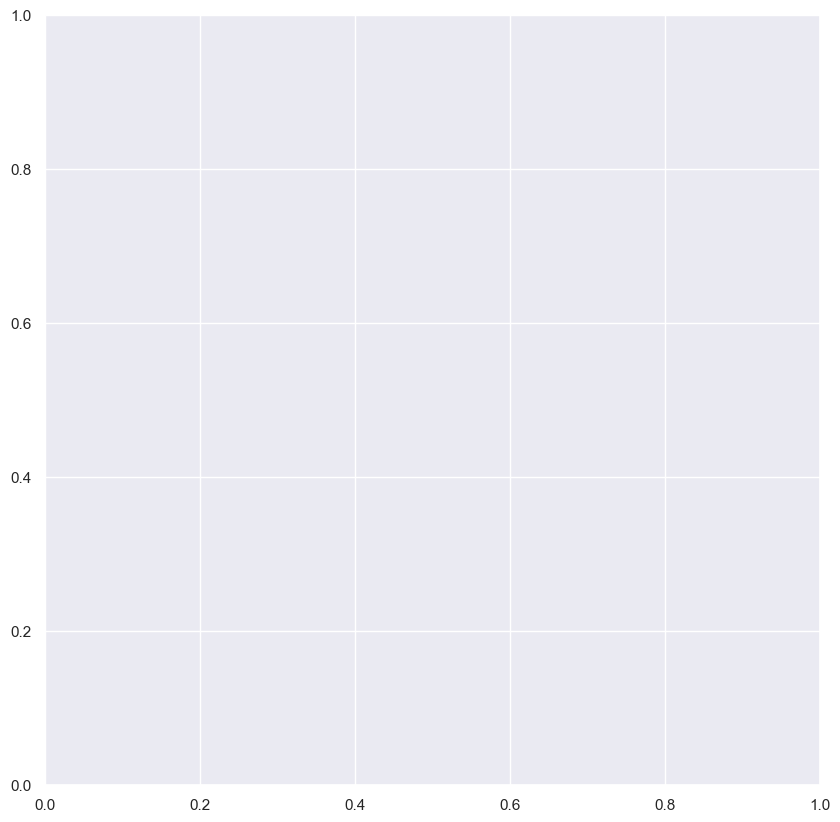

In [1]:
# Plot the cell types
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=ct_df, x='pt_position_x', y='pt_position_y', hue='cell_type', ax=ax)

# Get the synapses
syn_df = client.materialize.query_table('synapses_pni_2',
                                        filter_equal_dict={'pre_pt_root_id': 648518346349471113},
                                        select_columns=['pre_pt_root_id', 'ctr_pt_position', 'post_pt_root_id'])